In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#u(t,x)とする
def culc_u(div_num_x):

    div_num_t = int(div_num_x**2)  # 時間tの分割数

    u = np.zeros((div_num_t + 1, div_num_x + 1)) #配列uの初期化　数値解が入る

    h = 1 / div_num_x

    u[0] = [np.sin(np.pi * i * h) for i in range(div_num_x + 1)]

    for i in range(div_num_t):
        for j in range(1, div_num_x):
            u[i + 1, j] = 0.5 * (u[i, j - 1] + u[i, j + 1])

    return u


In [47]:

def culc_u_unique_solution(div_num_x):
    t = np.linspace(0, 0.5, int(div_num_x**2) + 1)
    x = np.linspace(0, 1, div_num_x + 1)
    X,T = np.meshgrid(x,t)

    u_unique_solution=np.exp(-T*(np.pi**2))*np.sin(np.pi*X)
    return u_unique_solution


In [48]:
def culc_err(div_num_x):
    return np.max(np.abs(culc_u_unique_solution(div_num_x)-culc_u(div_num_x)))/np.max(np.abs(culc_u_unique_solution(div_num_x)))

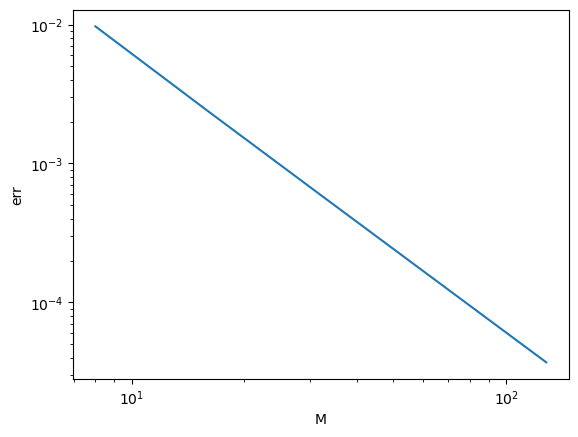

In [68]:
div_num_x_list=[8,16,32,64,128]
err_list=[culc_err(i) for i in div_num_x_list]
div_num_x_list=np.array(div_num_x_list)
plt.plot(div_num_x_list,err_list)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("M")
plt.ylabel("err")
plt.show()